### Generate and analyse clean signal

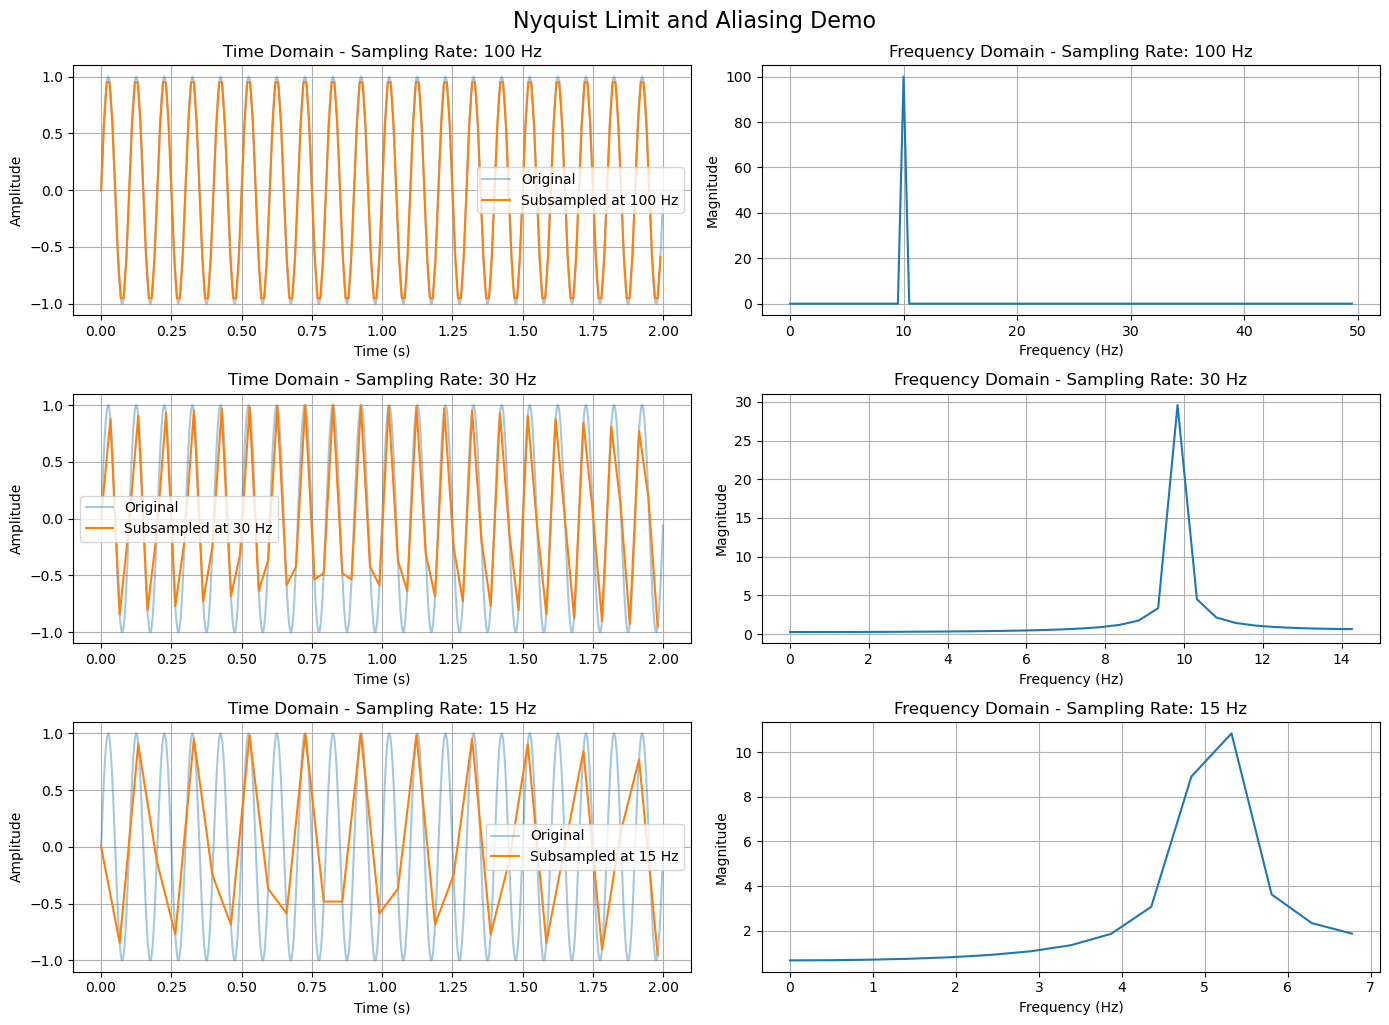

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from scipy.signal import butter, sosfiltfilt

# Base parameters
duration = 2  # seconds
true_fs = 1000  # original (high) sampling rate in Hz
f_signal = 10  # signal frequency in Hz

# Time vector and original sine wave
t = np.linspace(0, duration, int(true_fs * duration), endpoint=False)
signal = np.sin(2 * np.pi * f_signal * t)

# Subsample rates to test
sample_rates = [100, 30, 15]  # Above, near, and below Nyquist for f_signal = 30 Hz

plt.figure(figsize=(14, 10))

for i, fs in enumerate(sample_rates):
    step = int(true_fs / fs)
    t_sub = t[::step]
    signal_sub = signal[::step]

    # Time-domain subplot
    plt.subplot(len(sample_rates), 2, 2*i + 1)
    plt.plot(t, signal, label='Original', alpha=0.4)
    plt.plot(t_sub, signal_sub, label=f'Subsampled at {fs} Hz')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.title(f'Time Domain - Sampling Rate: {fs} Hz')
    plt.grid(True)
    plt.legend()

    # Frequency-domain subplot
    N = len(signal_sub)
    yf = np.abs(fft(signal_sub))[:N//2]
    xf = fftfreq(N, 1/fs)[:N//2]

    plt.subplot(len(sample_rates), 2, 2*i + 2)
    plt.plot(xf, yf)
    plt.title(f'Frequency Domain - Sampling Rate: {fs} Hz')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.grid(True)

plt.tight_layout()
plt.suptitle('Nyquist Limit and Aliasing Demo', fontsize=16, y=1.02)
plt.show()


### Generate and analyse noisy signal

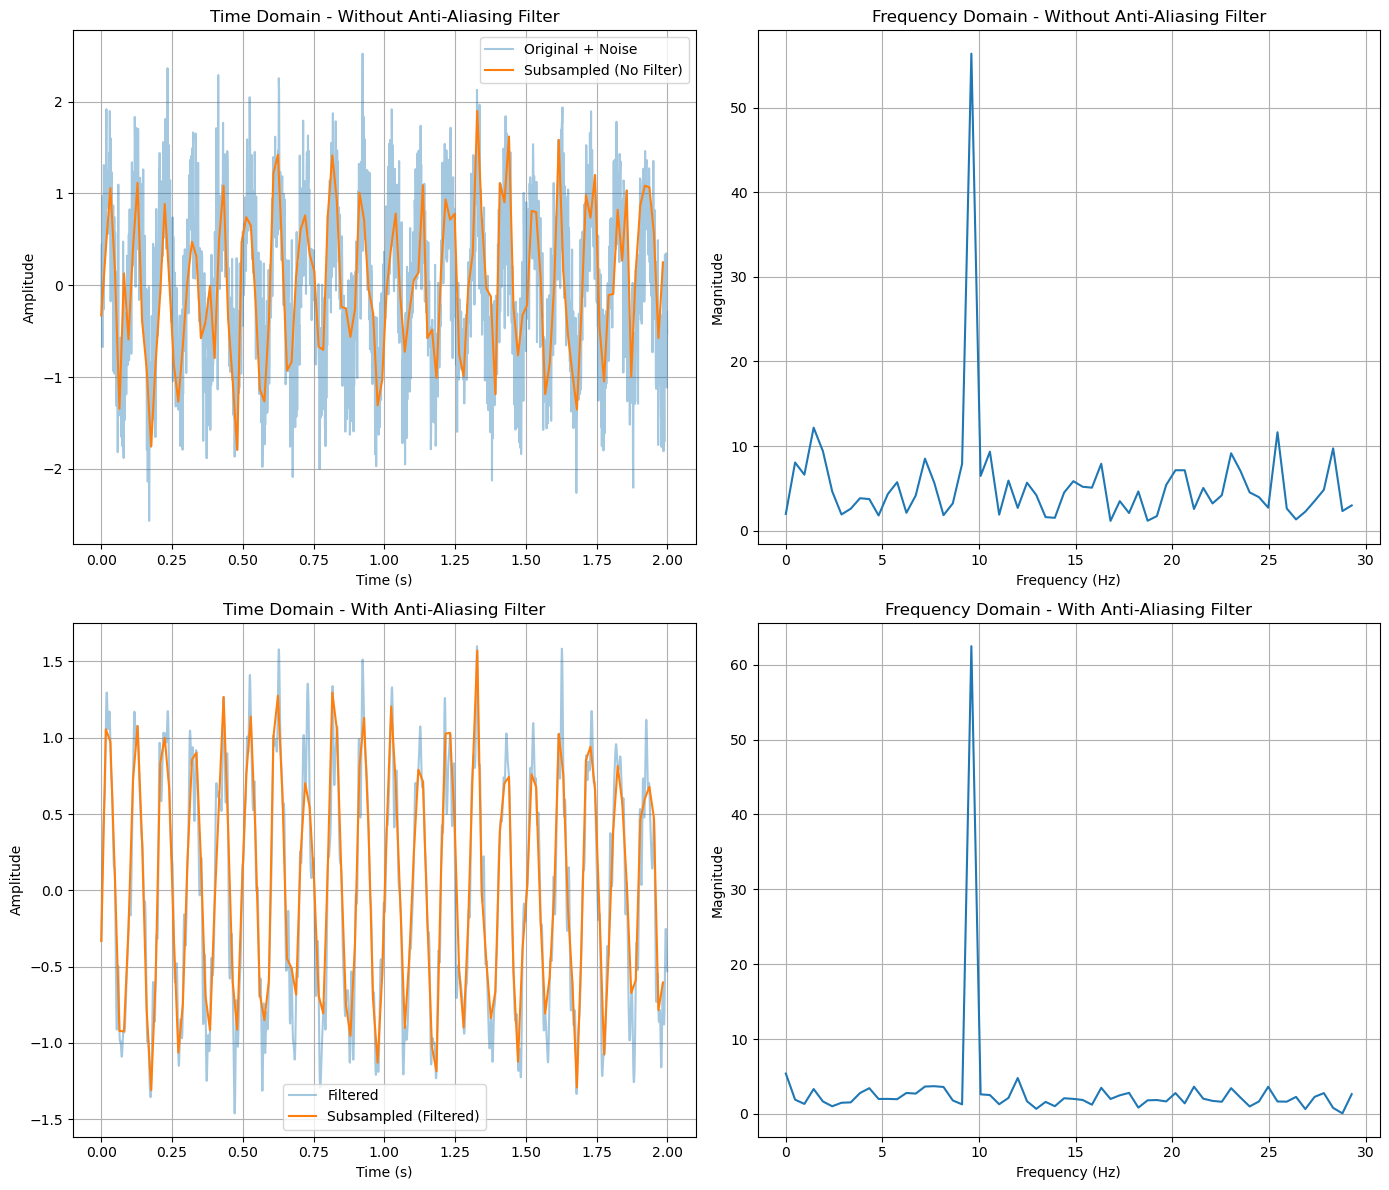

In [2]:
# Add band-limited noise (100–200 Hz) and white noise
white_noise = 0.5 * np.random.randn(len(t))

# Create band-limited noise (100–200 Hz)
def bandpass_noise(lowcut, highcut, fs, size):
    white = np.random.randn(size)
    sos = butter(4, [lowcut, highcut], btype='bandpass', fs=fs, output='sos')
    return sosfiltfilt(sos, white)

band_noise = 0.3 * bandpass_noise(20, 40, true_fs, len(t))

# Combined noisy signal
noisy_signal = signal + white_noise + band_noise

# Anti-aliasing filter (low-pass at 100 Hz)
def lowpass_filter(data, cutoff, fs):
    sos = butter(4, cutoff, btype='lowpass', fs=fs, output='sos')
    return sosfiltfilt(sos, data)

filtered_signal = lowpass_filter(noisy_signal, 100, true_fs)

# Subsample parameters
sub_fs = 60  # Hz
step = int(true_fs / sub_fs)
t_sub = t[::step]
noisy_sub = noisy_signal[::step]
filtered_sub = filtered_signal[::step]

# Frequency spectrum function
def compute_fft(sig, fs):
    N = len(sig)
    xf = fftfreq(N, 1/fs)[:N//2]
    yf = np.abs(fft(sig))[:N//2]
    return xf, yf

# Plotting
plt.figure(figsize=(14, 12))

# Time domain - unfiltered
plt.subplot(2, 2, 1)
plt.plot(t, noisy_signal, label='Original + Noise', alpha=0.4)
plt.plot(t_sub, noisy_sub, label='Subsampled (No Filter)')
plt.title('Time Domain - Without Anti-Aliasing Filter')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

# Frequency domain - unfiltered
xf, yf = compute_fft(noisy_sub, sub_fs)
plt.subplot(2, 2, 2)
plt.plot(xf, yf)
plt.title('Frequency Domain - Without Anti-Aliasing Filter')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)

# Time domain - filtered
plt.subplot(2, 2, 3)
plt.plot(t, filtered_signal, label='Filtered', alpha=0.4)
plt.plot(t_sub, filtered_sub, label='Subsampled (Filtered)')
plt.title('Time Domain - With Anti-Aliasing Filter')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

# Frequency domain - filtered
xf_f, yf_f = compute_fft(filtered_sub, sub_fs)
plt.subplot(2, 2, 4)
plt.plot(xf_f, yf_f)
plt.title('Frequency Domain - With Anti-Aliasing Filter')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)


plt.tight_layout()
plt.show()
